In [1]:
from Detector.detector import Detector_v4
import cv2 as cv
import torch
from torchvision import transforms
import Detector.visualize as visualize  # TODO check imports
import re
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import random

In [6]:
detector = Detector_v4()

Detector initiated successfully


In [3]:
def plot_image(detections, img, detector, output_path=None):
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)

    if detections is not None:
        # browse detections and draw bounding boxes
        for x1, y1, box_w, box_h, conf in detections:
            color = (0,0,1,1)
            bbox = patches.Rectangle((x1, y1), box_w, box_h,
                 linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(bbox)
            plt.text(x1, y1, s=str(round(conf,2)), 
                    color='white', verticalalignment='top',
                    bbox={'color': color, 'pad': 0})
    plt.axis('off')
    # save image
    # plt.savefig(img_path.replace(".jpg", "-det.jpg"),        
    #                   bbox_inches='tight', pad_inches=0.0)
    if output_path is not None:
        plt.savefig(output_path)
    plt.show()

None


<Figure size 432x288 with 0 Axes>

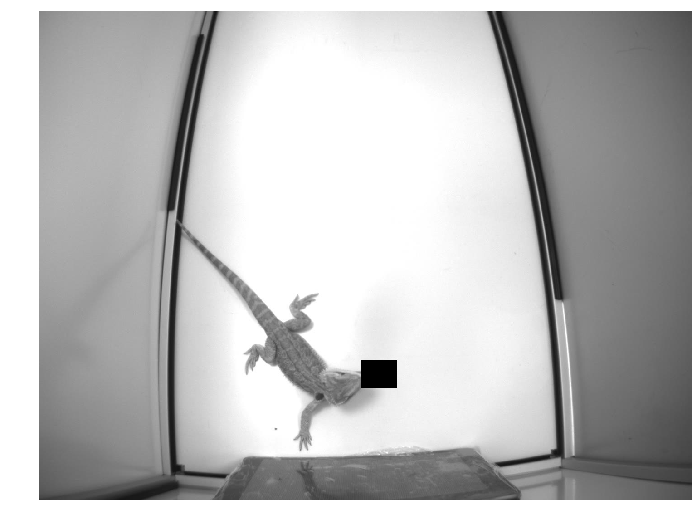

In [8]:
image = cv.imread("testnohand.jpeg")
detector.model_width = image.shape[1]
detector.model_height = image.shape[0]
detections = detector.detect_image(image)
print(detections)
plot_image(detections, image, detector, "testnohand_labelled.jpg")